In [37]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
import matplotlib
from collections import Counter
%matplotlib inline

file_name = "~/Data1030Project/data/preprocessed.csv"
df = pd.read_csv(file_name)

origin_file_name = "~/Data1030Project/data/data.xls"
df_old = pd.read_excel(origin_file_name, skiprows = 1)
df_old = df_old.drop("ID", axis = 1)
df_old.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,Y
0,-1.136720,0.051724,0.25,0.25,0.0,0.0,0.0,0.00,-0.642501,-0.647399,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,-0.365981,0.086207,0.00,0.25,0.0,0.0,0.0,0.25,-0.659219,-0.666747,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.597202,0.224138,0.00,0.00,0.0,0.0,0.0,0.00,-0.298560,-0.493899,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.905498,0.275862,0.00,0.00,0.0,0.0,0.0,0.00,-0.057491,-0.013293,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,-0.905498,0.620690,0.00,0.00,0.0,0.0,0.0,0.00,-0.578618,-0.611318,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [39]:
y = df["Y"]
X = df.drop(columns = "Y")
continuous = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

one_hot = [ 'PAY_0_-2', 'PAY_0_-1', 'PAY_0_0','PAY_2_-2', 
       'PAY_2_-1', 'PAY_2_0', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0',
       'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0', 'SEX_1', 'SEX_2', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3']


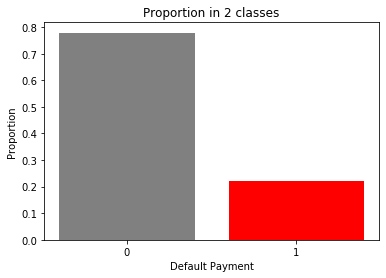

In [40]:
# class proportion

c = Counter(y)
bars = sorted(list(c.keys()))
height = [c[k]/30000 for k in bars]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = ["gray", 'red'])
plt.ylabel('Proportion')
plt.xlabel("Default Payment")
plt.title('Proportion in 2 classes')

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.savefig('../figures/class_proportion.png',dpi=300)
plt.show()

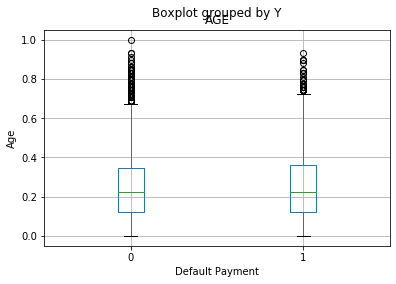

In [41]:
#Age vs. default
df[["AGE", "Y"]].boxplot(by="Y")
plt.ylabel("Age")
plt.xlabel("Default Payment")
plt.savefig('../figures/age_default.png',dpi=300)
plt.show()

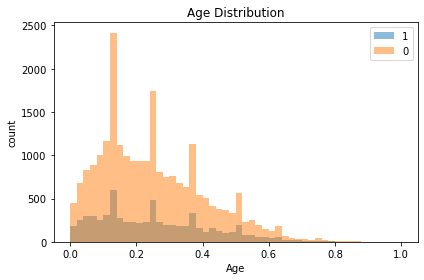

In [48]:
categories = df['Y'].unique()
bin_range = (df['AGE'].min(),df['AGE'].max())
for c in categories:
    plt.hist(df[df['Y']==c]['AGE'],alpha=0.5,label=c,range=bin_range,bins=50)
plt.legend()
plt.ylabel('count')
plt.xlabel('Age')
plt.title("Age Distribution")
plt.tight_layout()
plt.savefig('../figures/age_distribution.png',dpi=300)
plt.show()

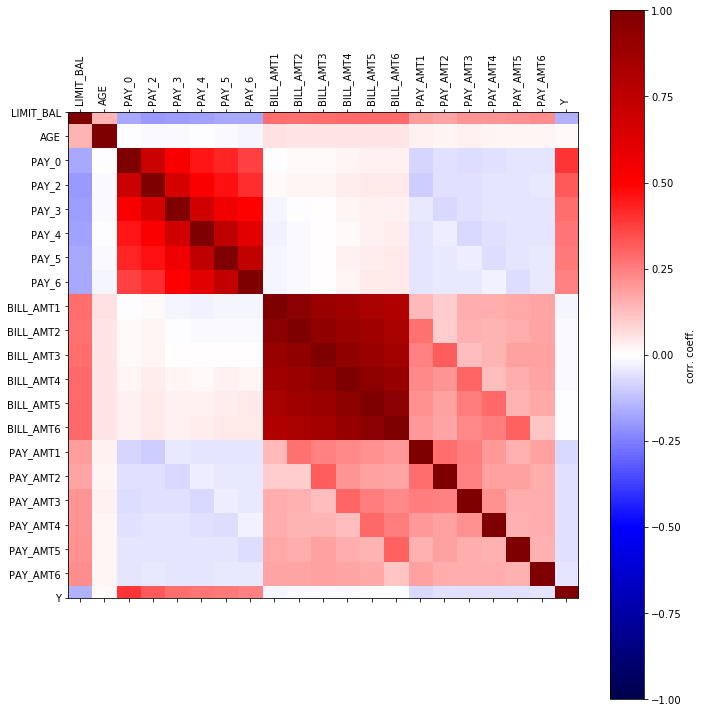

In [43]:
con = df[continuous + ["Y"]]
plt.figure(figsize=(10,10))
plt.matshow(con.corr(),vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(con.corr().shape[0]),list(con.corr().columns),rotation=90)
plt.yticks(np.arange(con.corr().shape[0]),list(con.corr().columns))
plt.tight_layout()
plt.savefig('../figures/cor_mat.png',dpi=300)
plt.show()

In [17]:
count_matrix = df_old.groupby(['SEX', 'default payment next month']).size().unstack()
print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

default payment next month      0     1
SEX                                    
1                            9015  2873
2                           14349  3763
default payment next month         0         1
SEX                                           
1                           0.758328  0.241672
2                           0.792237  0.207763


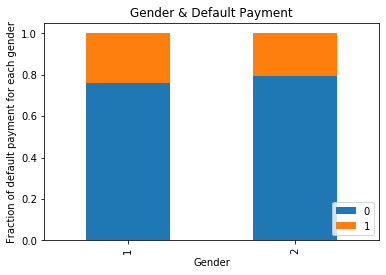

In [47]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of default payment for each gender')
plt.xlabel('Gender')
plt.title("Gender & Default Payment")
plt.legend(loc=4)
plt.savefig('../figures/gender_default_stacked.png',dpi=300)
plt.show()

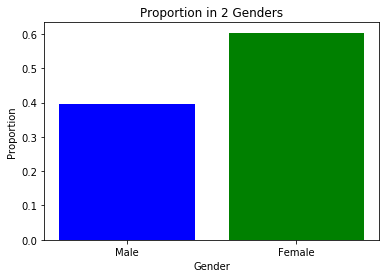

In [45]:
# gender proportion

c = Counter(df_old["SEX"])
bars = sorted(list(c.keys()))
height = [c[k]/30000 for k in bars]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = ["blue", 'green'])
plt.ylabel('Proportion')
plt.xlabel("Gender")
plt.title('Proportion in 2 Genders')

# Create names on the x-axis
plt.xticks(y_pos, ["Male", "Female"])

# Show graphic
plt.savefig('../figures/gender_proportion.png',dpi=300)
plt.show()